# Template matching with noise
This repo demonstrate the robustness of template matching against noise.
The following script run 2 detections with the same template, image and parameters.
Only for the second detection we introduce some random noise in the image.

In [1]:
# 1st import the package and check its version
import MTM
print("MTM version : ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

C:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


MTM version :  1.15.1


Let's open one image from the Zenodo repo using scikit-image

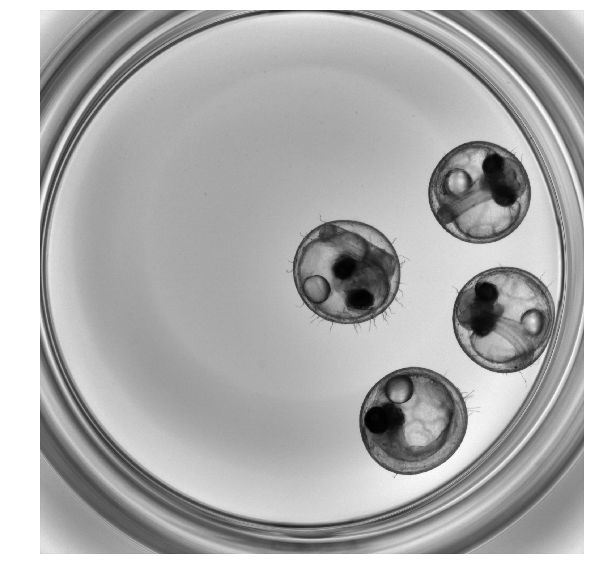

In [90]:
URL = r"https://zenodo.org/record/2650147/files/WE00049---E001--PO01--LO001--CO6--00000000_00.01.00_00.16.00%2C000.jpg"
image = io.imread(URL)
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(image, cmap="gray")

Let's crop one of the egg to use as a template

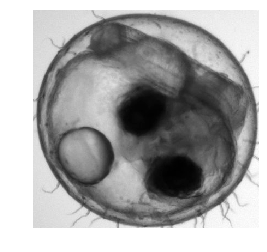

In [92]:
temp0 = image[784:784+400, 946:946+414] # with well 49 
plt.axis("off")
plt.imshow(temp0, cmap="gray")

We can now call `matchTemplates` with this single template image and the initial image

In [93]:
listTemplate = [('temp0', temp0)]
Hits = matchTemplates(listTemplate, image, N_object=4, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0.3)
print(Hits)

                     BBox     Score TemplateName
0    [946, 784, 414, 400]  1.000000        temp0
1   [1398, 889, 414, 400]  0.512312        temp0
2   [1438, 481, 414, 400]  0.472887        temp0
3  [1064, 1238, 414, 400]  0.461289        temp0


# Adding noise
Let see the effect on the detection when we add noise to the initial image.

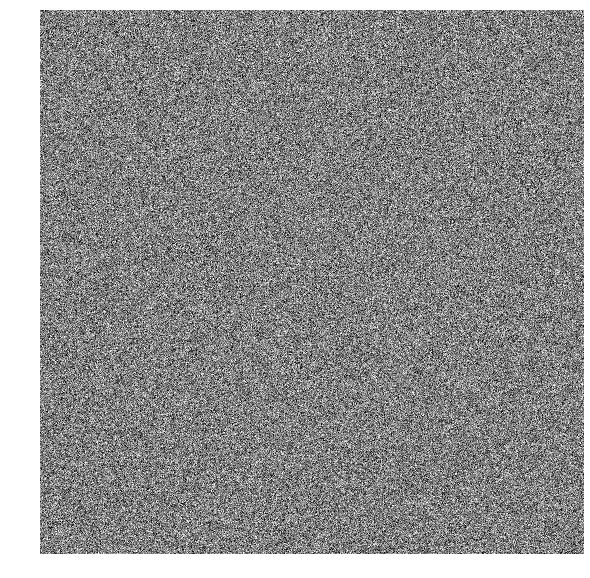

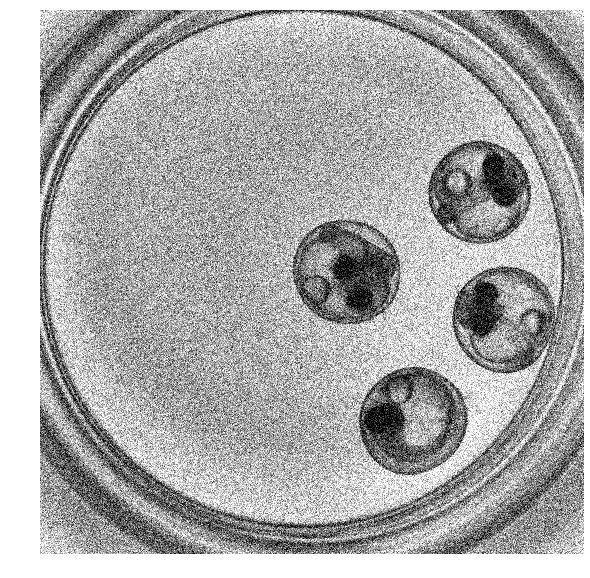

In [134]:
# Generate gaussian distributed noise, the noise intensity is set by the level variable
noise = np.empty_like(image, dtype="int8")
level = 50
cv2.randn(noise,(0),(level)) # Matrix element are 0 in average
                
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(noise, cmap="gray")

imageNoise = cv2.add(image,noise, dtype=cv2.CV_8U)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(imageNoise, cmap="gray")

In [135]:
# Call again matchTemplates with the noisy image this time, but the same template
Hits_Noise = matchTemplates(listTemplate, imageNoise, N_object=4,  score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0.3)

print("Initial detections")
print(Hits)

print("\nDetections with noise")
print(Hits_Noise)

Initial detections
                     BBox     Score TemplateName
0    [946, 784, 414, 400]  1.000000        temp0
1   [1398, 889, 414, 400]  0.512312        temp0
2   [1438, 481, 414, 400]  0.472887        temp0
3  [1064, 1238, 414, 400]  0.461289        temp0

Detections with noise
                     BBox     Score TemplateName
0    [946, 784, 414, 400]  0.767905        temp0
1   [1395, 889, 414, 400]  0.421703        temp0
2   [1438, 481, 414, 400]  0.374432        temp0
3  [1066, 1236, 414, 400]  0.373938        temp0


The coordinates of the bounding boxes are slightly shifted by a few pixels with the noisy version of the image, and as we could expect the score is also reduced.

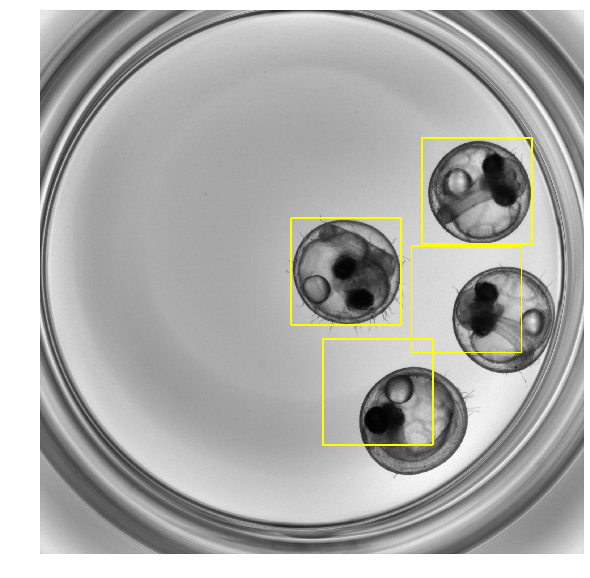

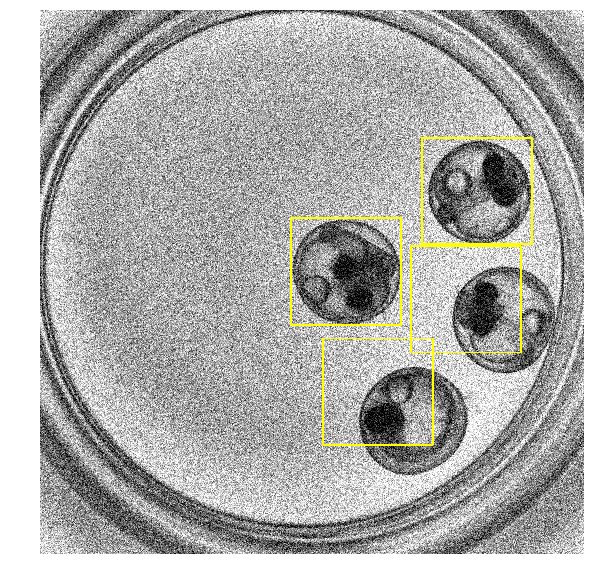

In [141]:
Overlay1 = drawBoxesOnRGB(image, Hits, boxThickness=5)
Overlay2 = drawBoxesOnRGB(imageNoise, Hits_Noise, boxThickness=5) 

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(Overlay1)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(Overlay2)